<a href="https://colab.research.google.com/github/borbysh/Momentum-QNG/blob/main/portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline


In [2]:
sessions = [
    {"optimizer" : "QNGOptimizer",
     "params" : {"approx" : 'block-diag', "lam" : 0},
     "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]},
    {"optimizer" :  "AdamOptimizer",
     "params" : {"beta1" : 0.9, "beta2" : 0.99, "epsilon" : 1.0e-8},
     "params_name" : "$\mathit{"+ chr(946) + "}_1$=0.9, $\mathit{"+ chr(946) + "}_2$=0.99, $\mathit{"+ chr(949) +"}$=$10^{-8}$",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]},
    {"optimizer" :  "MomentumOptimizer",
     "params" : {"momentum" : 0.9},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]},
    {"optimizer" :  "MomentumQNGOptimizer",
     "params" : {"momentum" : 0.9},
     "params_name" : "$\mathit{"+ chr(961) +"}$=0.9, approx='block-diag', $\mathit{"+ chr(955) + "}$=0",
     "stepsizes" : [0.01,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225,0.25]}
]

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
C:\Users\mbrat\AppData\Local\Temp\ipykernel_240424\2682334514.py:4: SyntaxWarning: invalid escape sequence '\m'
  "params_name" : "approx='block-diag', $\mathit{"+ chr(955) + "}$=0",
C:\Users\mbrat\AppData\Local\Temp\ipykernel_240424\2682334514.py:8: SyntaxWarning: invalid escape sequence '\m'

In [3]:
init_count = 200
steps = 200



In [4]:
sessions_params = []
sessions_steps = []
sessions_delta_energy = []

file1_name = "../qng/1/portfolio_optimization_12_qng_delta_energy_2025-01-28.dat"
file2_name = "../qng/2/portfolio_optimization_12_qng_delta_energy_2025-01-27.dat"
fileout_name = "portfolio_optimization_12_qng_delta_energy.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
qng_delta_energy = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_delta_energy = [0]*init_count
    qng_delta_energy.append(stepsize_delta_energy)

line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

sessions[0]["stepsizes"] = stepsizes



for i in range(1,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        qng_delta_energy[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        qng_delta_energy[counter][i-1] = float(line2[j])
        counter += 1        
    print(i,line,file=fout)

sessions_delta_energy.append(qng_delta_energy)



file1_name = "../adam/1/portfolio_optimization_12_adam_delta_energy_2025-01-28.dat"
file2_name = "../adam/2/portfolio_optimization_12_adam_delta_energy_2025-01-27.dat"
fileout_name = "portfolio_optimization_12_adam_delta_energy.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
adam_delta_energy = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_delta_energy = [0]*init_count
    adam_delta_energy.append(stepsize_delta_energy)
    
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

sessions[1]["stepsizes"] = stepsizes

for i in range(1,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        adam_delta_energy[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        adam_delta_energy[counter][i-1] = float(line2[j])
        counter += 1        
    print(i,line,file=fout)

sessions_delta_energy.append(adam_delta_energy)


file1_name = "../mom/1/portfolio_optimization_12_mom_delta_energy_2025-01-28.dat"
file2_name = "../mom/2/portfolio_optimization_12_mom_delta_energy_2025-01-27.dat"
fileout_name = "portfolio_optimization_12_mom_delta_energy.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
mom_delta_energy = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_delta_energy = [0]*init_count
    mom_delta_energy.append(stepsize_delta_energy)

line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

sessions[2]["stepsizes"] = stepsizes


for i in range(1,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        mom_delta_energy[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        mom_delta_energy[counter][i-1] = float(line2[j])
        counter += 1        
    print(i,line,file=fout)

sessions_delta_energy.append(mom_delta_energy)

file1_name = "../momqng/1/portfolio_optimization_12_momqng_delta_energy_2025-01-28.dat"
file3_name = "../momqng/3/portfolio_optimization_12_momqng_delta_energy_2025-01-28.dat"
file4_name = "../momqng/4/portfolio_optimization_12_momqng_delta_energy_2025-01-28.dat"
file5_name = "../momqng/5/portfolio_optimization_12_momqng_delta_energy_2025-01-28.dat"
file6_name = "../momqng/6/portfolio_optimization_12_momqng_delta_energy_2025-01-28.dat"
fileout_name = "portfolio_optimization_12_momqng_delta_energy.dat"
file1 = open(file1_name, "r")
file3 = open(file3_name, "r")
file4 = open(file4_name, "r")
file5 = open(file5_name, "r")
file6 = open(file6_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f3lines = file3.readlines()
f4lines = file4.readlines()
f5lines = file5.readlines()
f6lines = file6.readlines()
momqng_delta_energy = []
stepsizes_count = 9 #len(f1lines[0].split()) -1 + len(f3lines[0].split()) + len(f4lines[0].split()) + len(f5lines[0].split()) + len(f6lines[0].split()) - 5
for i in range(stepsizes_count):
    stepsize_delta_energy = [0]*init_count
    momqng_delta_energy.append(stepsize_delta_energy)
    
line1 = f1lines[0].split()
line3 = f3lines[0].split()
line4 = f4lines[0].split()
line5 = f5lines[0].split()
line6 = f6lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)-1):
    stepsizes[counter] = float(line1[j])
    counter += 1
#for j in range(1,len(line3)):
#    stepsizes[counter] = float(line3[j])
#    counter += 1    
for j in range(1,2): #len(line4)):
    stepsizes[counter] = float(line4[j])
    counter += 1    
for j in range(1,2): #len(line5)):
    stepsizes[counter] = float(line5[j])
    counter += 1    
for j in range(1,2): #len(line6)):
    stepsizes[counter] = float(line6[j])
    counter += 1    
stepsizes[counter] = float(line6[4])
#print(stepsizes)
sessions[3]["stepsizes"] = stepsizes

for i in range(1,len(f1lines)):
    line1 = f1lines[i].split()
    line3 = f3lines[i].split()
    line4 = f4lines[i].split()
    line5 = f5lines[i].split()
    line6 = f6lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)-1):
        line += line1[j] + " "
        momqng_delta_energy[counter][i-1] = float(line1[j])
        counter += 1
#    for j in range(1,len(line3)):
#        line += line3[j] + " "
#        momqng_delta_energy[counter][i-1] = float(line3[j])
#        counter += 1 
    for j in range(1,2): #len(line4)):
        line += line4[j] + " "
        momqng_delta_energy[counter][i-1] = float(line4[j])
        counter += 1   
    for j in range(1,2): #len(line5)):
        line += line5[j] + " "
        momqng_delta_energy[counter][i-1] = float(line5[j])
        counter += 1   
    for j in range(1,2): #len(line6)):
        line += line6[j] + " "
        momqng_delta_energy[counter][i-1] = float(line6[j])
        counter += 1           
    momqng_delta_energy[counter][i-1] = float(line6[4])
    print(i,line,file=fout)

sessions_delta_energy.append(momqng_delta_energy)
#print(sessions_steps)


#print(sessions_delta_energy)

In [5]:
sessions_steps = []
file1_name = "../qng/1/portfolio_optimization_12_qng_steps_2025-01-28.dat"
file2_name = "../qng/2/portfolio_optimization_12_qng_steps_2025-01-27.dat"
fileout_name = "portfolio_optimization_12_qng_steps.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
qng_steps = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    qng_steps.append(stepsize_steps)

line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[0]["stepsizes"] = stepsizes



for i in range(1,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        qng_steps[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        qng_steps[counter][i-1] = float(line2[j])
        counter += 1        
    print(i,line,file=fout)

sessions_steps.append(qng_steps)
#print(sessions_steps)


file1_name = "../adam/1/portfolio_optimization_12_adam_steps_2025-01-28.dat"
file2_name = "../adam/2/portfolio_optimization_12_adam_steps_2025-01-27.dat"
fileout_name = "portfolio_optimization_12_adam_steps.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
adam_steps = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    adam_steps.append(stepsize_steps)
    
line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[1]["stepsizes"] = stepsizes

for i in range(1,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        adam_steps[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        adam_steps[counter][i-1] = float(line2[j])
        counter += 1        
    print(i,line,file=fout)

sessions_steps.append(adam_steps)
#print(sessions_steps)

file1_name = "../mom/1/portfolio_optimization_12_mom_steps_2025-01-28.dat"
file2_name = "../mom/2/portfolio_optimization_12_mom_steps_2025-01-27.dat"
fileout_name = "portfolio_optimization_12_mom_steps.dat"
file1 = open(file1_name, "r")
file2 = open(file2_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f2lines = file2.readlines()
mom_steps = []
stepsizes_count = len(f1lines[0].split()) + len(f2lines[0].split()) - 2
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    mom_steps.append(stepsize_steps)

line1 = f1lines[0].split()
line2 = f2lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)):
    stepsizes[counter] = float(line1[j])
    counter += 1
for j in range(1,len(line2)):
    stepsizes[counter] = float(line2[j])
    counter += 1        

#sessions[2]["stepsizes"] = stepsizes


for i in range(1,len(f1lines)):
    line1 = f1lines[i].split()
    line2 = f2lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)):
        line += line1[j] + " "
        mom_steps[counter][i-1] = float(line1[j])
        counter += 1
    for j in range(1,len(line2)):
        line += line2[j] + " "
        mom_steps[counter][i-1] = float(line2[j])
        counter += 1        
    print(i,line,file=fout)

sessions_steps.append(mom_steps)
#print(sessions_steps)

file1_name = "../momqng/1/portfolio_optimization_12_momqng_steps_2025-01-28.dat"
file3_name = "../momqng/3/portfolio_optimization_12_momqng_steps_2025-01-28.dat"
file4_name = "../momqng/4/portfolio_optimization_12_momqng_steps_2025-01-28.dat"
file5_name = "../momqng/5/portfolio_optimization_12_momqng_steps_2025-01-28.dat"
file6_name = "../momqng/6/portfolio_optimization_12_momqng_steps_2025-01-28.dat"
fileout_name = "portfolio_optimization_12_momqng_steps.dat"
file1 = open(file1_name, "r")
file3 = open(file3_name, "r")
file4 = open(file4_name, "r")
file5 = open(file5_name, "r")
file6 = open(file6_name, "r")
fout = open(fileout_name,"w")
f1lines = file1.readlines()
f3lines = file3.readlines()
f4lines = file4.readlines()
f5lines = file5.readlines()
f6lines = file6.readlines()
momqng_steps = []
stepsizes_count = 9 #len(f1lines[0].split()) -1 + len(f3lines[0].split()) + len(f4lines[0].split()) + len(f5lines[0].split()) + len(f6lines[0].split()) - 5
for i in range(stepsizes_count):
    stepsize_steps = [0]*init_count
    momqng_steps.append(stepsize_steps)
    
line1 = f1lines[0].split()
line3 = f3lines[0].split()
line4 = f4lines[0].split()
line5 = f5lines[0].split()
line6 = f6lines[0].split()
stepsizes = [0]*stepsizes_count
counter = 0
for j in range(1,len(line1)-1):
    stepsizes[counter] = float(line1[j])
    counter += 1
#for j in range(1,len(line3)):
#    stepsizes[counter] = float(line3[j])
#    counter += 1    
for j in range(1,2): #len(line4)):
    stepsizes[counter] = float(line4[j])
    counter += 1    
for j in range(1,2): #len(line5)):
    stepsizes[counter] = float(line5[j])
    counter += 1    
for j in range(1,2): #len(line6)):
    stepsizes[counter] = float(line6[j])
    counter += 1    
stepsizes[counter] = float(line6[4])
#print(stepsizes)
#sessions[3]["stepsizes"] = stepsizes
#
for i in range(1,len(f1lines)):
    line1 = f1lines[i].split()
    line3 = f3lines[i].split()
    line4 = f4lines[i].split()
    line5 = f5lines[i].split()
    line6 = f6lines[i].split()
    line = ""
    counter = 0
    for j in range(1,len(line1)-1):
        line += line1[j] + " "
        momqng_steps[counter][i-1] = float(line1[j])
        counter += 1
#    for j in range(1,len(line3)):
#        line += line3[j] + " "
#        momqng_steps[counter][i-1] = float(line3[j])
#        counter += 1 
    for j in range(1,2): #len(line4)):
        line += line4[j] + " "
        momqng_steps[counter][i-1] = float(line4[j])
        counter += 1   
    for j in range(1,2): #len(line5)):
        line += line5[j] + " "
        momqng_steps[counter][i-1] = float(line5[j])
        counter += 1   
    for j in range(1,2): #len(line6)):
        line += line6[j] + " "
        momqng_steps[counter][i-1] = float(line6[j])
        counter += 1           
    momqng_steps[counter][i-1] = float(line6[4])
    print(i,line,file=fout)

sessions_steps.append(momqng_steps)
#print(sessions_steps)

#print(sessions_delta_energy)

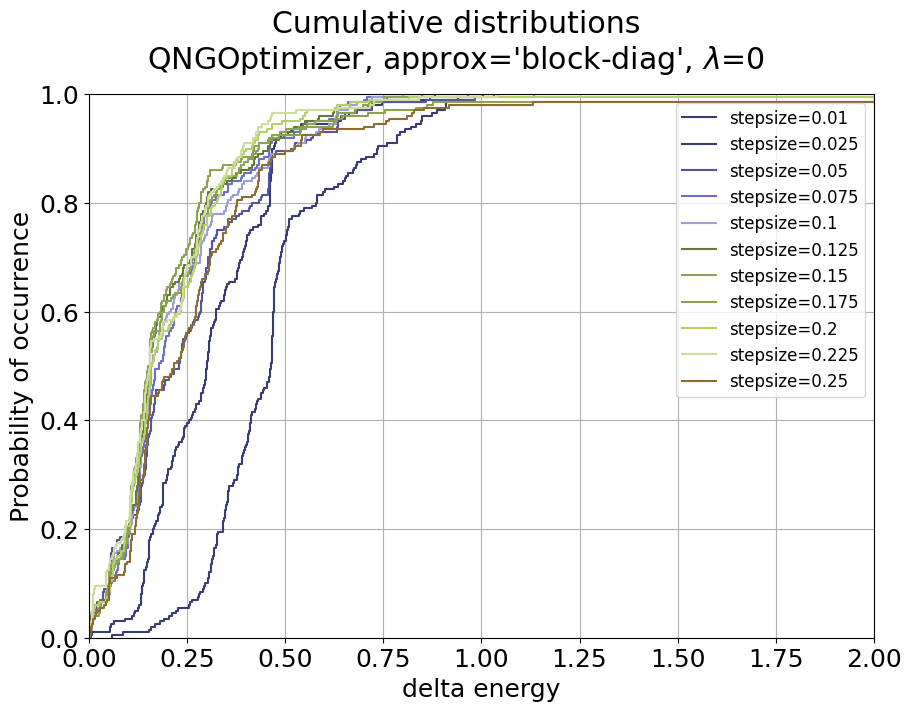

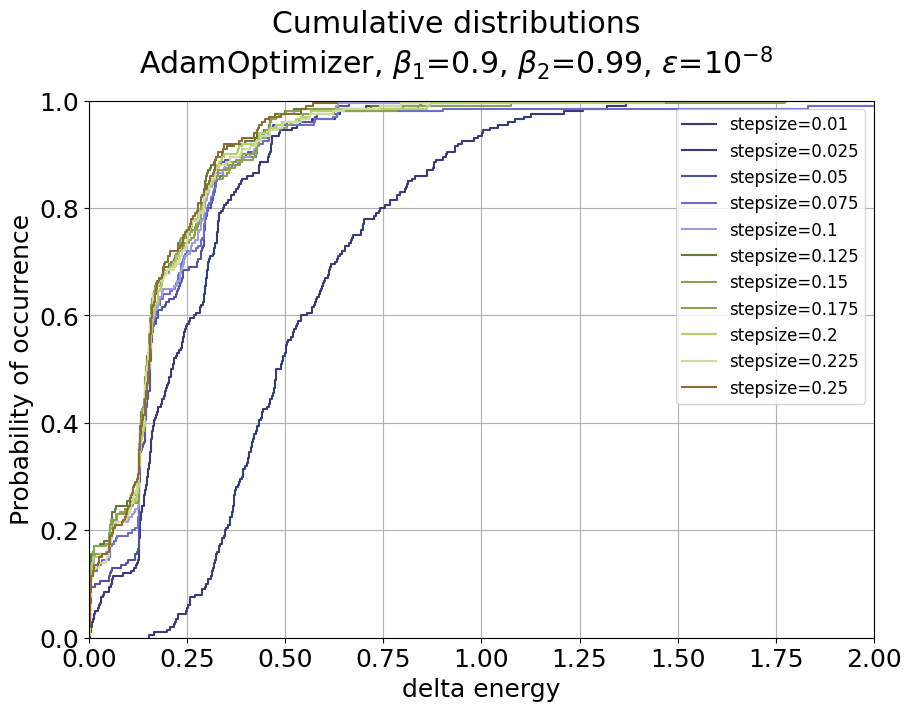

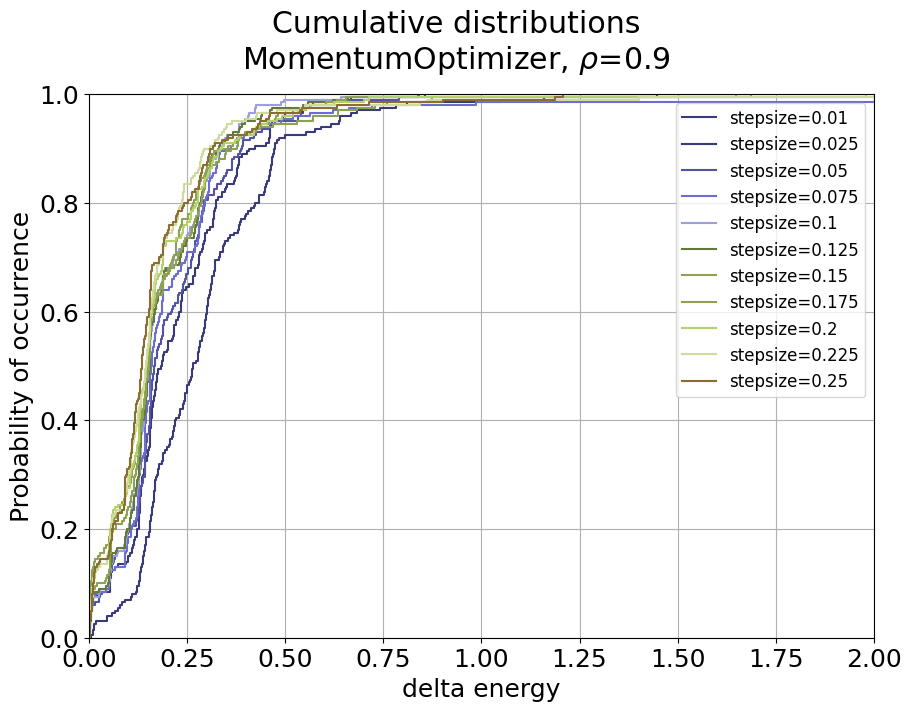

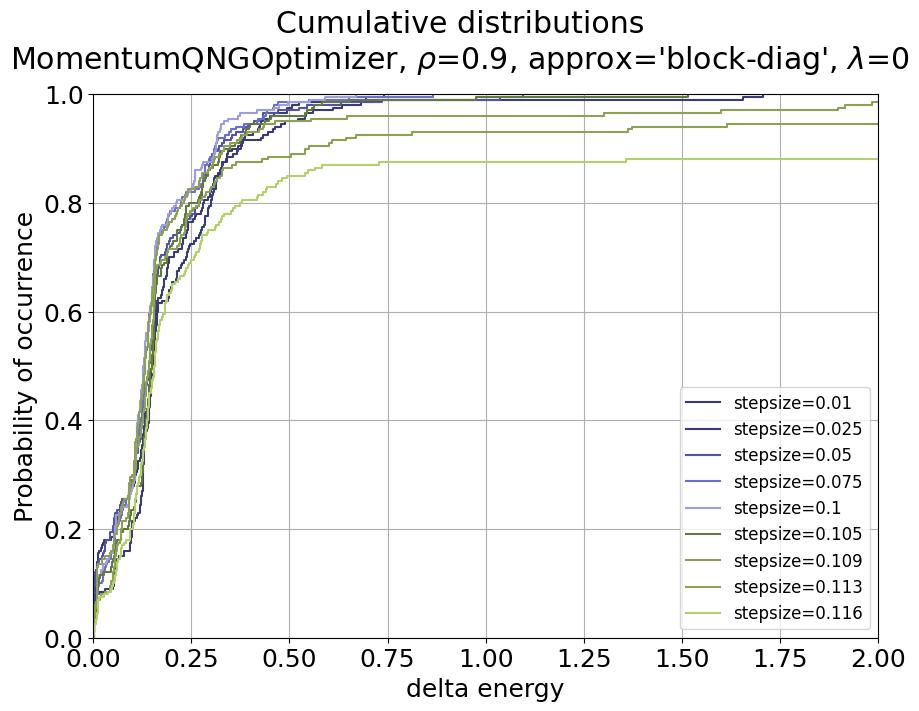

In [6]:
import matplotlib as mpl
from datetime import date
from matplotlib import pyplot as plt
import ipynbname
import numpy as np
ground_energy = -1.9083156
mpl.rcParams['font.size'] = 18

prefix_name = "portfolio_12_" #ipynbname.name() + "_" + str(date.today()) + "_"

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 25))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)

    # Cumulative distributions.

    for j,stepsize in enumerate(session["stepsizes"]):
        #print(sessions_delta_energy[i][j])
        axs.ecdf(sessions_delta_energy[i][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )

    # Label the figure.
    title = "Cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]

    fig.suptitle(title)

    axs.grid(True)
    axs.legend(fontsize=12)
    axs.set_xlabel("delta energy")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    axs.set_xlim(0.0, 2.0)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_quality.eps",format='eps',dpi=300)

#print(sessions_steps[0][0])

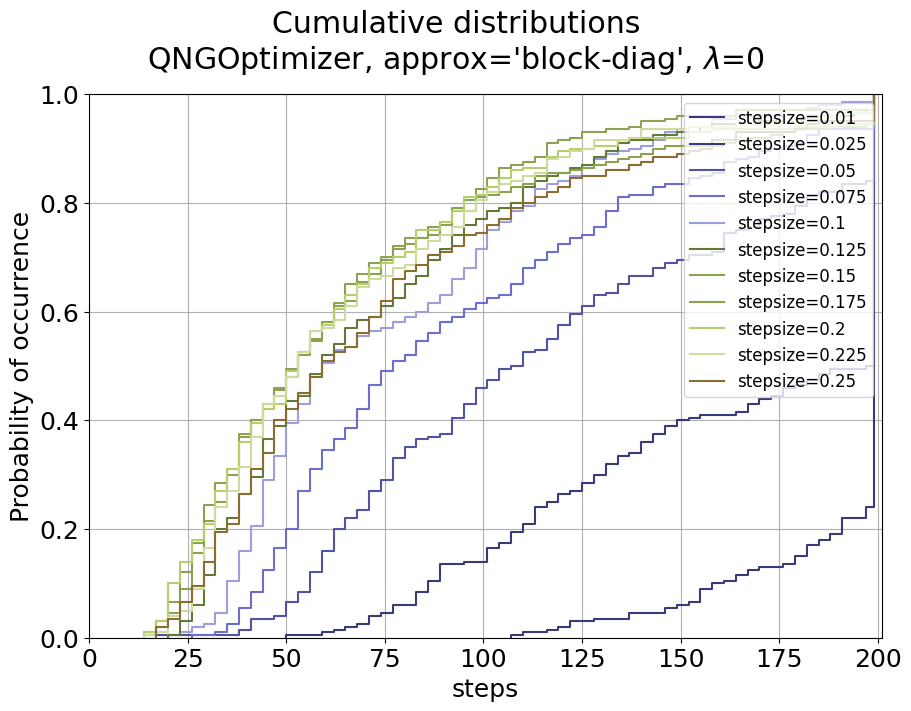

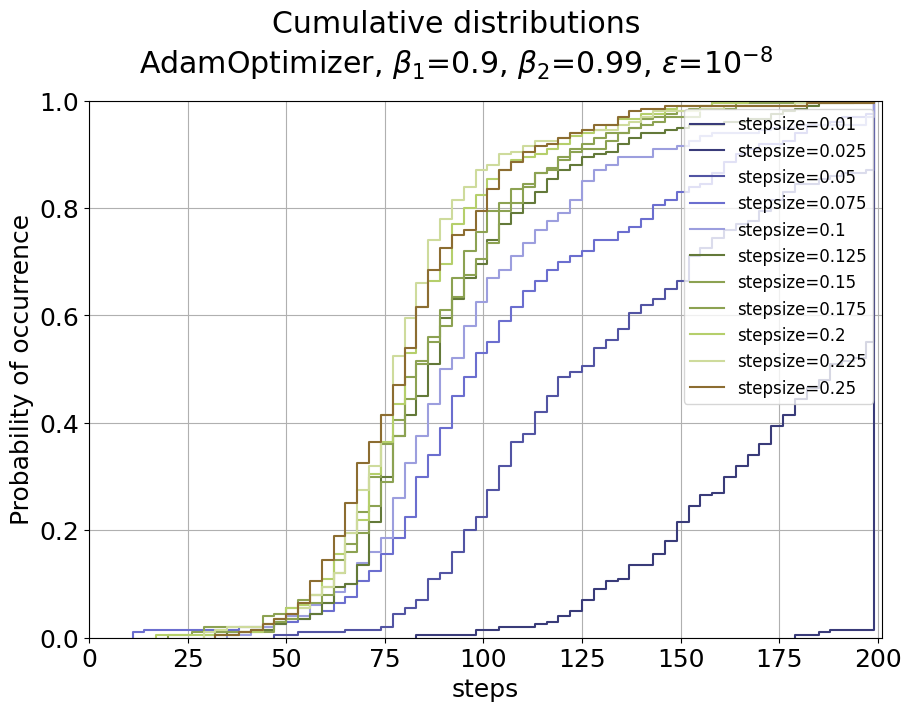

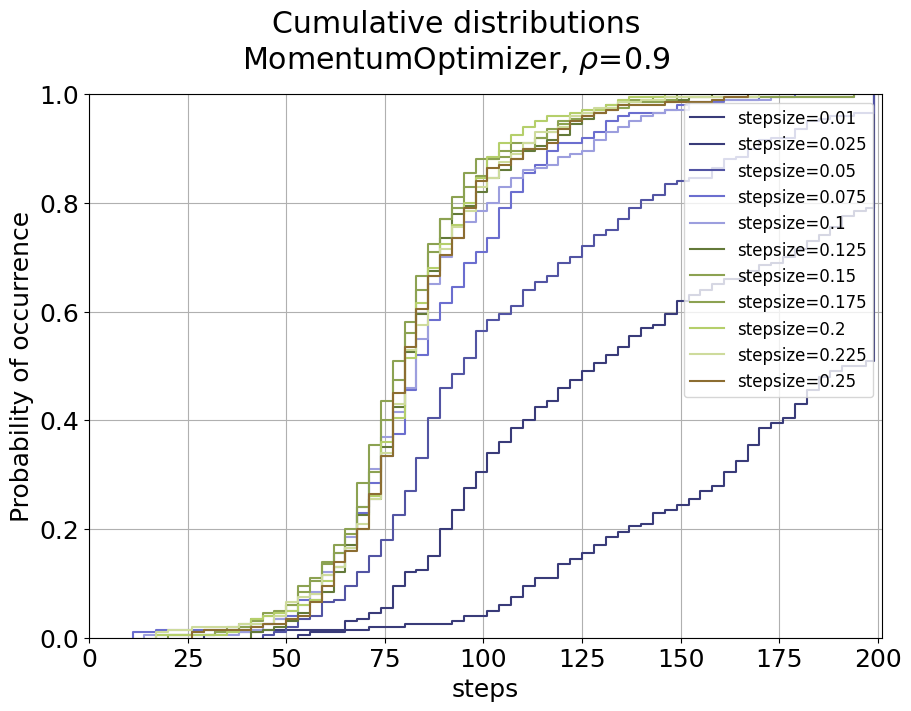

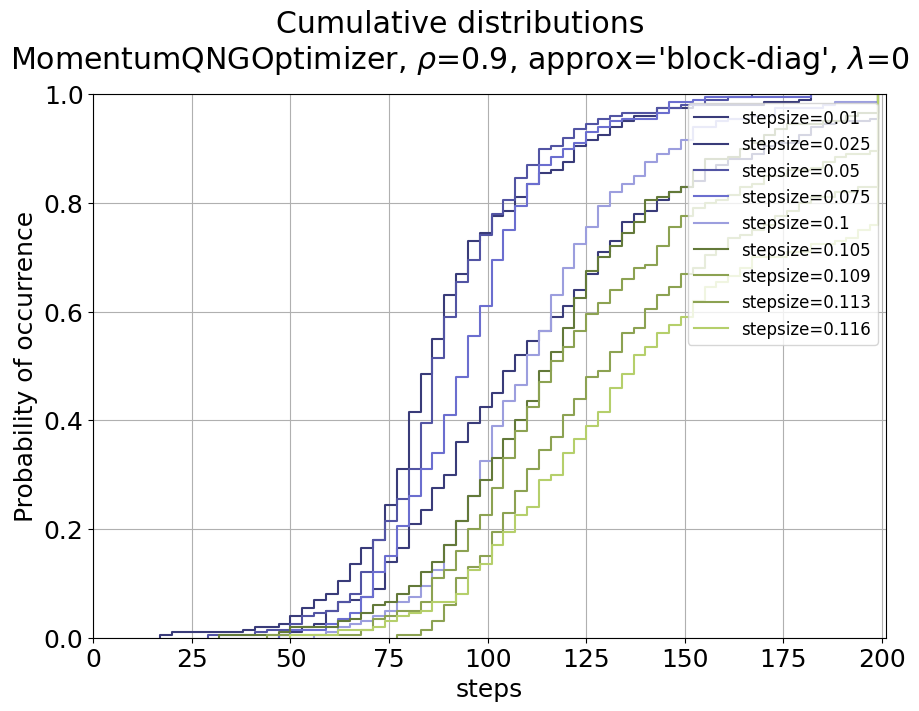

In [7]:
import matplotlib as mpl

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 25))

for i,session in enumerate(sessions):
    fig = plt.figure(figsize=(9, 7), layout="compressed")
    axs = fig.subplots(1, 1, sharex=True, sharey=True)

    # Cumulative distributions.
    #print(session["stepsizes"])
    for j,stepsize in enumerate(session["stepsizes"]):
        #print(i,j)
        #print(sessions_steps[i][j])
        axs.ecdf(sessions_steps[i][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )

    # Label the figure.
    title = "Cumulative distributions\n" + session["optimizer"]
    if(len(session["params_name"]) > 0):
        title += ", " + session["params_name"]

    fig.suptitle(title)

    axs.grid(True)
    axs.legend(loc="upper right",fontsize=12)
    axs.set_xlabel("steps")
    axs.set_ylabel("Probability of occurrence")
    axs.label_outer()
    axs.set_xlim(0.0, steps+1)
    plt.show()
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.png",format='png',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.pdf",format='pdf',dpi=300)
    #fig.savefig(prefix_name + session["optimizer"]+"_ccdf_steps.eps",format='eps',dpi=300)

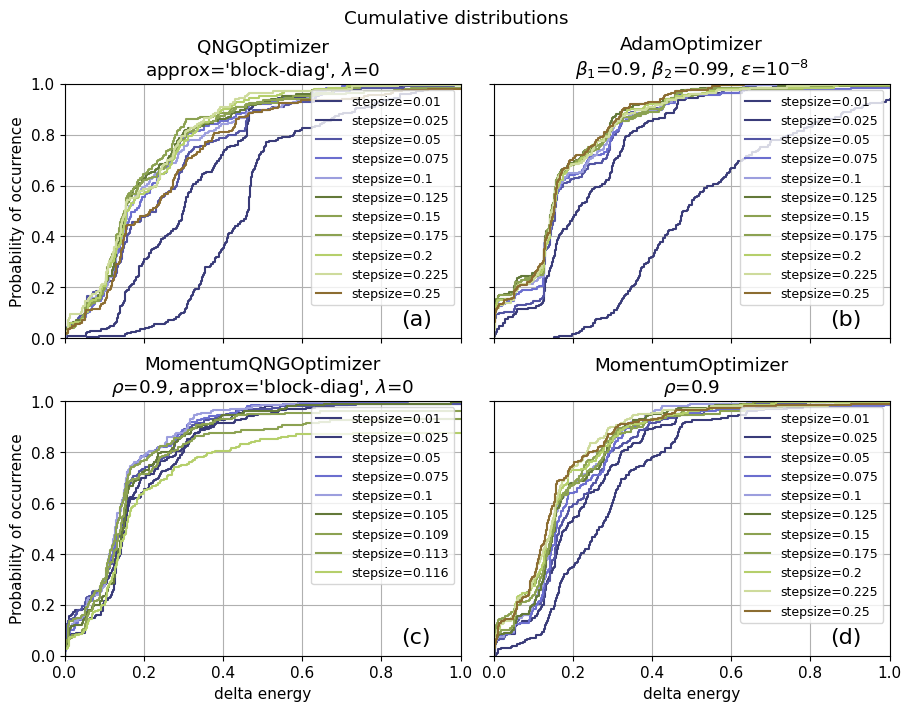

In [8]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 25))

for j,stepsize in enumerate(sessions[0]["stepsizes"]):
    axs[0][0].ecdf(sessions_delta_energy[0][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[1]["stepsizes"]):
    axs[0][1].ecdf(sessions_delta_energy[1][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[2]["stepsizes"]):
    axs[1][1].ecdf(sessions_delta_energy[2][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[3]["stepsizes"]):
    axs[1][0].ecdf(sessions_delta_energy[3][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )

session_id = [0,1,3,2]
axs[0][0].text(0.85,0.05,"(a)",fontsize=16)
axs[0][1].text(0.85,0.05,"(b)",fontsize=16)
axs[1][0].text(0.85,0.05,"(c)",fontsize=16)
axs[1][1].text(0.85,0.05,"(d)",fontsize=16)
fig.suptitle("Cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("delta energy")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, 1)
        axs[j][i].legend(loc="upper right",fontsize=9)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)

plt.show()
#fig.savefig(prefix_name + "delta_energy_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "delta_energy_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "delta_energy_ccdf.eps",format='eps',dpi=300)

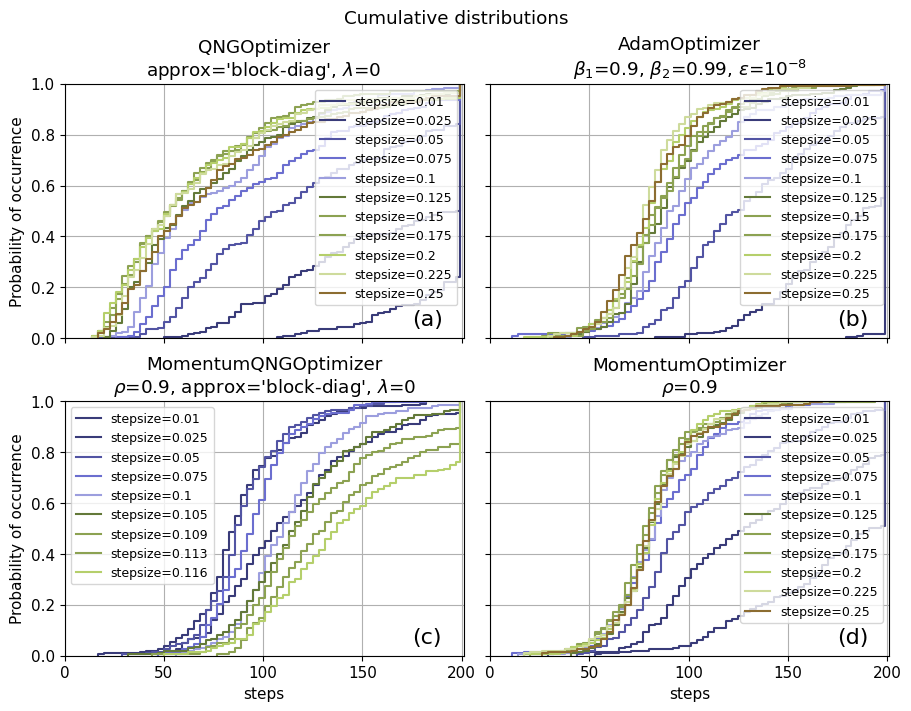

In [9]:
import matplotlib as mpl
mpl.rcParams['font.size'] = 11

fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(2, 2, sharex=True, sharey=True)

# Cumulative distributions.
cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 25))

for j,stepsize in enumerate(sessions[0]["stepsizes"]):
    axs[0][0].ecdf(sessions_steps[0][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[1]["stepsizes"]):
    axs[0][1].ecdf(sessions_steps[1][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[2]["stepsizes"]):
    axs[1][1].ecdf(sessions_steps[2][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )
for j,stepsize in enumerate(sessions[3]["stepsizes"]):
    axs[1][0].ecdf(sessions_steps[3][j],complementary=False, color=colors[j], label="stepsize="+str(stepsize) )

session_id = [0,1,3,2]
legend_loc = ["upper right","best","upper right","upper right"]

axs[0][0].text(175,0.05,"(a)",fontsize=16)
axs[0][1].text(175,0.05,"(b)",fontsize=16)
axs[1][0].text(175,0.05,"(c)",fontsize=16)
axs[1][1].text(175,0.05,"(d)",fontsize=16)
fig.suptitle("Cumulative distributions")
for i in range(2):
    for j in range(2):
        axs[j][i].grid(True)
        axs[j][i].set_xlabel("steps")
        axs[j][i].set_ylabel("Probability of occurrence")
        axs[j][i].label_outer()
        axs[j][i].set_xlim(0.0, steps+1)
        axs[j][i].legend(loc=legend_loc[i*2+j],fontsize=9)
        session = sessions[session_id[i*2+j]]
        title = session["optimizer"]
        if(len(session["params_name"]) > 0):
            title += "\n" + session["params_name"]
        axs[i][j].set_title(title)

plt.show()
#fig.savefig(prefix_name + "steps_ccdf.png",format='png',dpi=300)
fig.savefig(prefix_name + "steps_ccdf.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name + "steps_ccdf.eps",format='eps',dpi=300)

In [10]:
#!pip install torch

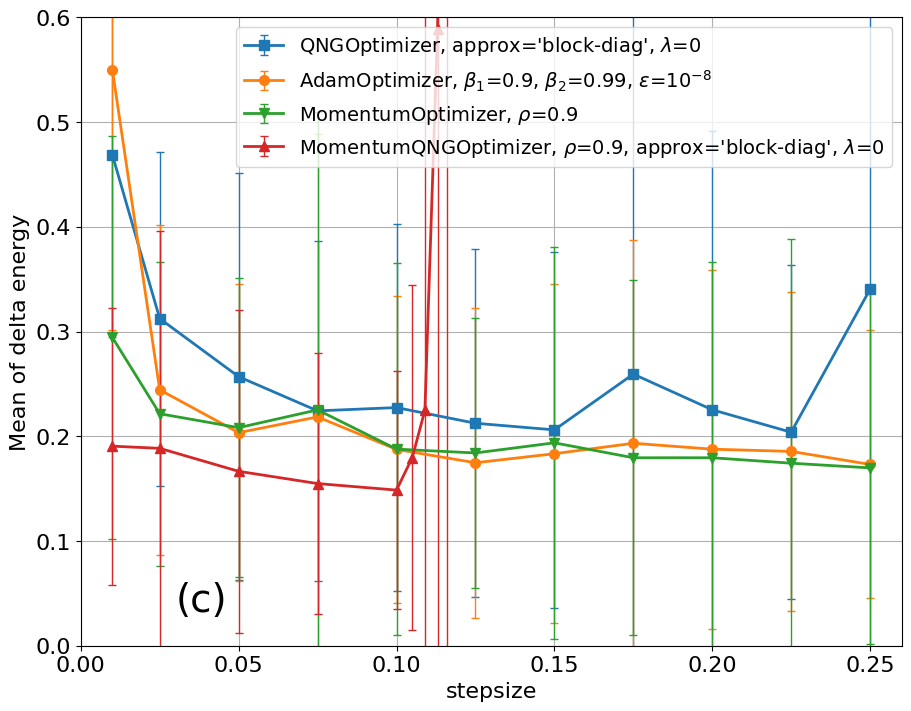

In [14]:
import matplotlib as mpl
import statistics
import math
import torch

mpl.rcParams['font.size'] = 16

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 25))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.03,0.033,"(c)",fontsize=28)
format_plot = ["s-","o-","v-","^-"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    for j,stepsize in enumerate(session["stepsizes"]):
        delta = []
        for k in range(len(sessions_delta_energy[i][j])):
            delta.append(float(sessions_delta_energy[i][j][k]))
        ave_val = statistics.mean(delta)
        stdev_val = statistics.stdev(delta)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)

    axs.grid(True)
    axs.legend(fontsize=14,loc="upper right")
    axs.set_xlabel("stepsize")
    axs.set_ylabel("Mean of delta energy")
    #axs.label_outer()
    axs.set_xlim(0.0, 0.26)
    axs.set_ylim(0.0, 0.6)
plt.show()
#fig.savefig(prefix_name+"ave_delta_energy.png",format='png',dpi=300)
fig.savefig(prefix_name+"ave_delta_energy.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"ave_delta_energy.eps",format='eps',dpi=300)

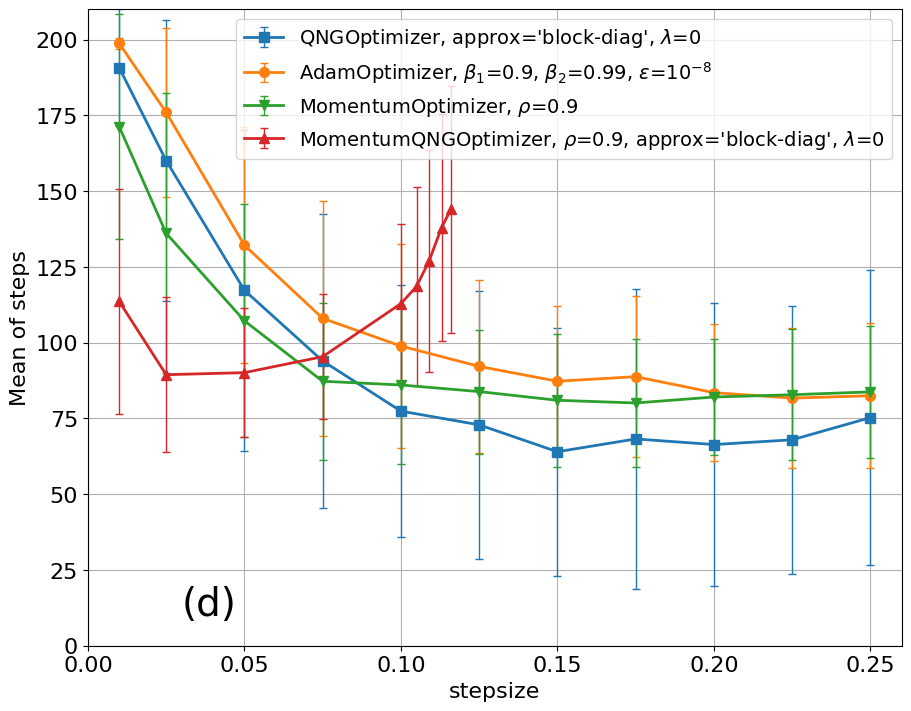

In [12]:
import matplotlib as mpl
import statistics
import math
import torch

cmap = mpl.colormaps['tab20b']
colors = cmap(np.linspace(0, 1, 25))
fig = plt.figure(figsize=(9, 7), layout="compressed")
axs = fig.subplots(1, 1, sharex=True, sharey=True)
axs.text(0.03,10.0,"(d)",fontsize=28)
format_plot = ["s-","o-","v-","^-"]
for i,session in enumerate(sessions):
    ave_session = []
    stdev_session = []
    for j,stepsize in enumerate(session["stepsizes"]):
        arr_steps = []
        for k in range(len(sessions_steps[i][j])):
            arr_steps.append(float(sessions_steps[i][j][k]))
        ave_val = statistics.mean(arr_steps)
        stdev_val = statistics.stdev(arr_steps)
        ave_session.append(ave_val)
        if(stdev_val == 'NaN'):
            stdev_val = 0
        stdev_session.append(stdev_val)
    label = session["optimizer"]
    if(len(session["params_name"]) > 0):
        label += ", " + session["params_name"]
    axs.errorbar(session["stepsizes"],ave_session,yerr=stdev_session,elinewidth=1,label=label,capsize=3,fmt=format_plot[i],ms=7,lw=2)

    axs.grid(True)
    axs.legend(fontsize=14,loc="upper right")
    axs.set_xlabel("stepsize")
    axs.set_ylabel("Mean of steps")
    #axs.label_outer()
    axs.set_xlim(0.0, 0.26)
    axs.set_ylim(0.0, 210)
plt.show()
#fig.savefig(prefix_name +"ave_steps.png",format='png',dpi=300)
fig.savefig(prefix_name+"ave_steps.pdf",format='pdf',dpi=300)
#fig.savefig(prefix_name+"ave_steps.eps",format='eps',dpi=300)